# ED Data Wrangling Exercises

Emergency departments around the world must deal with highly attendance numbers on a daily basis. The following exercises work with multiple ED datasets.  You will wrangle the dataset into a useful format using `pandas `and then visualise the time series using `matplotlib`.

The data sets used in these exercises are synthetic, but have been generated to reflect real emergency department demand in the United Kingdom.

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Datasets

The dataset `syn_ts_ed_long.csv` contains data from 4 emergency departments in 2014.  The data are stored in **long** (sometimes called **tidy**) format.  You are provided with three columns: `date` (non unique date time formatted), `hosp` (int 1-4) and `attends` (int, daily number of attends at hosp $i$)

The dataset `syn_ts_wide.csv` contains the same data in wide format.  Each row now represents a unique date and each hospital ED has its own column. 



## Exercise 1

**Task 1:**

* Read the two datasets into a pandas dataframe and inspect the columns and data so that you understand the dataset description above.

**Hints**:
* The URL's for the datasets are provided below.

In [2]:
# your code here ...

LONG_URL = 'https://raw.githubusercontent.com/health-data-science-OR/' \
            + 'hpdm139-datasets/main/syn_ts_ed_long.csv'
WIDE_URL = 'https://raw.githubusercontent.com/health-data-science-OR/' \
            + 'hpdm139-datasets/main/syn_ts_ed_wide.csv'

In [3]:
# example solution
long_df = pd.read_csv(LONG_URL)
long_df.head()

,date,hosp,attends
0,2014-04-01,1,331
1,2014-04-02,1,340
2,2014-04-03,1,316
3,2014-04-04,1,304
4,2014-04-05,1,292


In [4]:
wide_df = pd.read_csv(WIDE_URL)
wide_df.head()

,date,hosp_1,hosp_2,hosp_3,hosp_4
0,2014-04-01,331,287,195,184
1,2014-04-02,340,293,177,181
2,2014-04-03,316,249,183,192
3,2014-04-04,304,313,208,157
4,2014-04-05,292,291,218,166


# Exercise 2:

Assume you have only been provided with `syn_ts_ed_long.csv`.

**Task:**
* Convert the data into wide format.
* the output of your code should a `pd.Dataframe` equivalent to `syn_ts_ed_wide.csv`
* Make a decision about the appropraite data types for each of the series.  For example, by default the attendance column is an `int64`.  Is this sensible? What other type of integer could the hospital columns be stored as?  

**Advanced Task:**
* Your data wrangling code should make use of **chained commands** in `pandas`.

**Hints**
* There are various ways to complete this task.  You may want to make use of `pivot_table`.
* One complication with a pivot is that you end up with a `MultiIndex` column for the hospital and number of attends. This is not always particularly clear for labelling. An option is to remove the Mulit-index during wrangling.  You could explore the of transposing the `pd.Dataframe` using `.T` and the `.reset_index()` to drop the index.
* You may want to build up your code command by command to help debug as you go along.
* Don't forget about data types.  
 

In [5]:
# your code here ...

In [6]:
# example solution

def ed_data_to_wide(file_path):
    '''
    Return the ED data in wide format.
    
    1. Pivot table
    2. Transpose and drop the ('attends', hosp_i) multi-index
    3. Rename columns [0, 1, 2, 4] tp ['hosp_1', 'hosp_2', 'hosp_3', 'hosp_4']
    4. Index to DateTimeIndex
    5. Drop the additional uneeded series 'date' (as stored in index as well)
    6. Convert attendence numbers from int64 to int16
    
    Params:
    ------
    file_path: str
        Path to wide format file
        
    Returns:
    -------
    pandas.DataFrame
    '''
    # column name transfers
    translated_names = {0:'hosp_1', 
                        1:'hosp_2',
                        2:'hosp_3',
                        3:'hosp_4'}

    data_types = {'hosp_1':np.int16, 
                  'hosp_2':np.int16,
                  'hosp_3':np.int16,
                  'hosp_4':np.int16}

    df = (pd.read_csv(file_path)
            .pivot_table(values=['attends'], index=['date'], columns=['hosp'])
            .T.reset_index(drop=True)
            .T.rename(columns=translated_names)
            .assign(date=lambda x: pd.to_datetime(x.index))
            .set_index('date')
            .astype(data_types)
         )

    return df

In [7]:
wide_df = ed_data_to_wide(LONG_URL)
wide_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 275 entries, 2014-04-01 to 2014-12-31
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   hosp_1  275 non-null    int16
 1   hosp_2  275 non-null    int16
 2   hosp_3  275 non-null    int16
 3   hosp_4  275 non-null    int16
dtypes: int16(4)
memory usage: 4.3 KB


## Exercise 3:

Now assume that you have been provided with the data in `syn_ts_ed_wide.csv`

**Task**:
* Convert the dataset from wide format to long (tidy) format.

**Advanced task**
* Your data wrangling code should make use of **chained commands** in `pandas`.

**Hints:**
* Investigate the `pandas` function `wide_to_long()` or the function `melt()`

In [8]:
# your code here...

In [9]:
def ed_data_to_long(file_path):
    '''
    Return the ED data in long format. Uses pd.wide_to_long()
    Assume wide format file is used.
    
    1. pd.wide_to_long()
    2. reset_index() to remove multi-index
    3. rename col 'hosp_'  to 'attends'
    4. date to datetime
    5. Convert attendence numbers from int64 to int16 amd hosp_id to int8.
    (could also be a categorical field.)
    
    Params:
    ------
    file_path: str
        Path to wide format file
        
    Returns:
    -------
    pandas.DataFrame
    '''

    translated_names = {'hosp_':'attends'}
    data_types = {'hosp': np.int8, 'attends':np.int16}

    long_df = ( 
                pd.wide_to_long(pd.read_csv(file_path), stubnames='hosp_', 
                                i=['date'], j='hosp')
                .reset_index()
                .rename(columns=translated_names)
                .assign(date=lambda x: pd.to_datetime(x['date']))
                .astype(data_types)
                )

    return long_df


In [10]:
long_df = ed_data_to_long(WIDE_URL)
long_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     1100 non-null   datetime64[ns]
 1   hosp     1100 non-null   int8          
 2   attends  1100 non-null   int16         
dtypes: datetime64[ns](1), int16(1), int8(1)
memory usage: 11.9 KB


## Exercise 4

We will now move onto visualising the dataset using `matplotlib`

**Task**:
* Using the wide format data, create a line plot of the data for the ED located at hospital 1. 
* Label the y axis 'Attendances'
* Label x axis 'Date'
* Use a fontsize of 12
* Provide a background grid for the plot.
* Save the plot as a .png file with dpi of 300.

**Hints**
* Feel free to adapt the plot to improve its appearance using whatever `matplotlib` options you prefer.



In [ ]:
# your code here ...

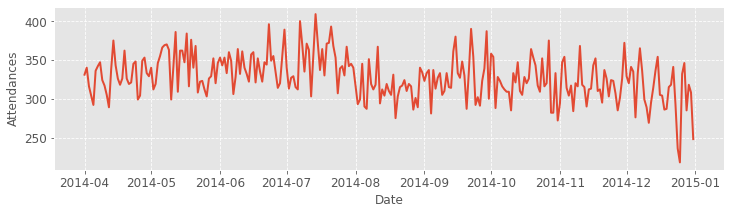

In [17]:
# example solution

fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot()
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Attendances", fontsize=12)

_ = ax.plot(wide_df['hosp_1'], lw=2)
# include x, y grid 
_ = ax.grid(ls='--')

# set size of x, y ticks
_ = ax.tick_params(axis='both', labelsize=12)

# save the figure
fig.savefig('hosp_1_ed.png', dpi=300)

## Exercise 5

**Task**:
* Create a grid of subplots with 1 column and 4 rows.  Each subplot should display one of the hospital ED's. 
* Label each subplot with the appropraite hospital.
* Provide an overall figure y axis label of 'ED Attendances'
* Give the figure and appropriate sizing

**Hints:**
* There are several ways to create a grid of subplots.  The easiest for this problem is to use the **factory** function `plt.subplots()`.  Refer back to the `matplotlib` sections in the book for help.
* If you are using `matplotlib` version 3.4 or above you can use `fig.supylabel()` and `figsupxlabel()` to set an overall axis label.


In [ ]:
# your solution here ...

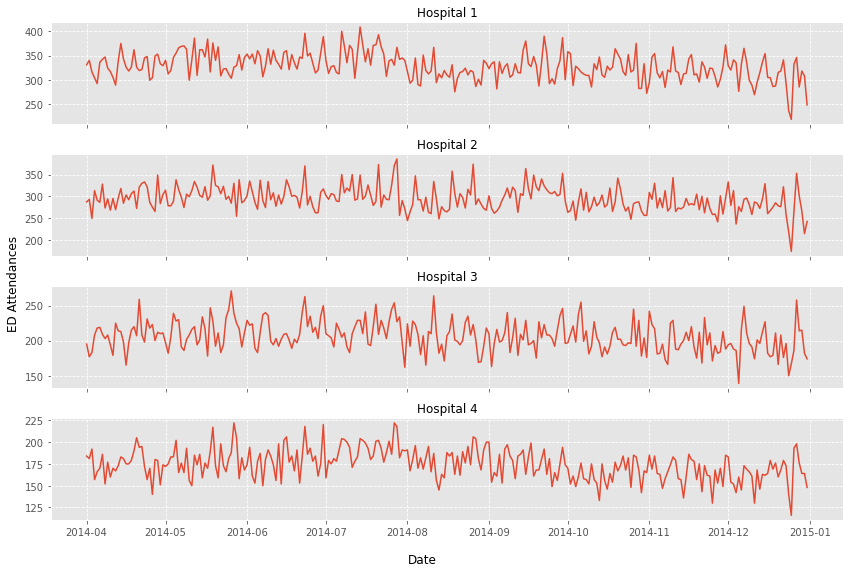

In [13]:
# example solution

# print(plt.style.available)  # list all default styles available
# plt.style.use('ggplot')

# try swapping tight_layout for constrained_layout=True and also omitting it.
fig, axs = plt.subplots(nrows=4, ncols=1, tight_layout=True, figsize=(12,8),
                        sharex=True)

# note that axs is a 2D array
FS_SUBTITLE = 12
for hosp_idx in range(0, 4):
    _ = axs[hosp_idx].plot(wide_df[f'hosp_{hosp_idx+1}'])
    _ = axs[hosp_idx].set_title(f'Hospital {hosp_idx+1}', fontsize=FS_SUBTITLE)
    _ = axs[hosp_idx].grid(ls='--')

# axis labels matplotlib >=3.4 
AXIS_LABEL_SIZE = 12
_ = fig.supylabel('ED Attendances', fontsize=AXIS_LABEL_SIZE)
_ = fig.supxlabel('Date', fontsize=AXIS_LABEL_SIZE)
